# Loading Image From a File

In [1]:
%matplotlib inline

import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np
import time as t

PATH = "/home/jeff/Jupyter-Notebooks/DataSets/Images/"   # path to images

print("Python Version: %s.%s.%s" % sys.version_info[:3])
print("OpenCV Version: %s" % cv2.__version__)

Python Version: 3.6.3
OpenCV Version: 3.4.0


### Load Image From File

In [2]:
t0 = t.time()
image = cv2.imread(PATH + "Lenna.png")    # Lenna Sjööblom
t1 = t.time()
dt_cv = t1 - t0
print("Read took %0.5f seconds" % dt_cv)

Read took 0.00679 seconds


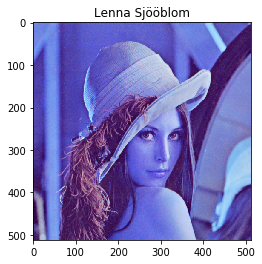

Plot took 0.17374 seconds


In [3]:
t0 = t.time()
plt.title("Lenna Sjööblom")
plt.imshow(image)
plt.show()
t1 = t.time()
dt_cv = t1 - t0
print("Plot took %0.5f seconds" % dt_cv)

The image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as BGR.
Matplotlib's plot expects an RGB image so, for a correct display of the image, it is necessary to swap those channels. 
This operation can be done either by using openCV conversion functions `cv2.cvtColor()` or by working directly with the numpy array.

### Correct Color

`cvtColor` is the openCV function which changes the color space of an image. It takes as input an image and a numerical flag which represents the conversion function. Let's list some of that.

In [4]:
BGRflags = [flag for flag in dir(cv2) if flag.startswith('COLOR_BGR') ]
print(BGRflags)

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12', 'COLOR_BGR5552BGR', 'COLOR_BGR5552BGRA', 'COLOR_BGR5552GRAY', 'COLOR_BGR5552RGB', 'COLOR_BGR5552RGBA', 'COLOR_BGR5652BGR', 'COLOR_BGR5652BGRA', 'COLOR_BGR5652GRAY', 'COLOR_BGR5652RGB', 'COLOR_BGR5652RGBA', 'COLOR_BGRA2BGR', 'COLOR_BGRA2BGR555', 'COLOR_BGRA2BGR565', 'COLOR_BGRA2GRAY', 'COLOR_BGRA2RGB', 'COLOR_BGRA2RGBA', 'COLOR_BGRA2YUV_I420', 'COLOR_BGRA2YUV_IYUV', 'COLOR_BGRA2YUV_YV12']


In this case it's necessary to change the image space from BGR (Blue, Green, Red) to RGB, so the correct flag is cv2.COLOR_BGR2RGB

In [5]:
t0 = t.time()
cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
t1 = t.time()
dt_cv = t1 - t0
print("Conversion took %0.5f seconds" % dt_cv)

Conversion took 0.00204 seconds


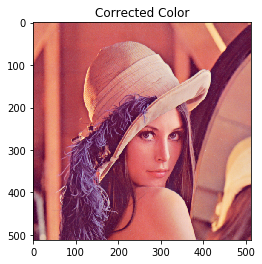

In [6]:
plt.imshow(cv_rgb)
plt.title("Corrected Color")
plt.show()

# Using OpenCV

In [7]:
import cv2

# load the image and show it
image = cv2.imread(PATH + "vending_machine.png")
cv2.imshow("original", image)

# put mouse on window and press any key on our keyboard to kill window
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# print the (width, height, channels) 
print(image.shape)

(500, 375, 3)


Since we know that our image is 375 pixels in height, let’s resize it and make it 100 pixels high but keeping the aspect ratio.

In [9]:
# we need to keep in mind aspect ratio so the image does
# not look skewed or distorted -- therefore, we calculate
# the ratio of the new image to the old image
r = 100.0 / image.shape[1]
dim = (100, int(image.shape[0] * r))
 
# perform the actual resizing of the image and show it
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
cv2.imshow("resized", resized)

# put mouse on window and press any key on our keyboard to kill window
cv2.waitKey(0)
cv2.destroyAllWindows()

Let's rotate our image

In [10]:
# grab the dimensions of the image and calculate the center of the image
(h, w) = image.shape[:2]
center = (w / 2, h / 2)
 
# rotate the image by 90 degrees
M = cv2.getRotationMatrix2D(center, 90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2.imshow("rotated", rotated)

# put mouse on window and press any key on our keyboard to kill window
cv2.waitKey(0)
cv2.destroyAllWindows()

crop the image

In [11]:
# crop the image using array slices -- it's a NumPy array after all!
cropped = image[70:170, 45:370]
cv2.imshow("cropped", cropped)

# put mouse on window and press any key on our keyboard to kill window
cv2.waitKey(0)
cv2.destroyAllWindows()

# imutils
This package includes a series of OpenCV + convenience functions that perform basics tasks such as
translation, rotation, resizing, and skeletonization.
This package also assumes that you already have NumPy and OpenCV installed
(along with matplotlib, if you intend on using the opencv2matplotlib function).

### Translation
Translation is the shifting of an image in either the x or y direction. 

In [12]:
import cv2
import imutils

image = cv2.imread(PATH + "Lenna.jpg")

# translate the image x=25 pixels to the right and y=75 pixels up
translated = imutils.translate(image, 25, -75)

cv2.imshow("orignal-image", image)
cv2.imshow("trans-image", translated)

# put mouse on window and press any key on our keyboard to kill window
cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotation
Rotating an image around an (x, y)-coordinate. 

In [13]:
image = cv2.imread(PATH + "Lenna.jpg")

# loop over the angles to rotate the image
for angle in range(0, 360, 90):
	# rotate the image and display it
	rotated = imutils.rotate(image, angle=angle)
	cv2.imshow("Angle=%d" % (angle), rotated)

# put mouse on window and press any key on our keyboard to kill window
cv2.waitKey(0)
cv2.destroyAllWindows()

### Resizing
Resizing an image in OpenCV is accomplished by calling the cv2.resize  function.
However, special care needs to be taken to ensure that the aspect ratio is maintained.
This resize  function of imutils  maintains the aspect ratio.
It provides the keyword arguments "width" and "height"
so the image can be resized to the intended width/height while
1. maintaining aspect ratio
2. ensuring the dimensions of the image do not have to be explicitly computed by the developer.

In [ ]:
image = cv2.imread(PATH + "Lenna.jpg")

# loop over varying widths to resize the image to
for width in (400, 300, 200, 100):
	# resize the image and display it
	resized = imutils.resize(image, width=width)
	cv2.imshow("Width=%dpx" % (width), resized)

# put mouse on window and press any key on our keyboard to kill window
cv2.waitKey(0)
cv2.destroyAllWindows()

### Skeletonization
Skeletonization is the process of constructing the “topological skeleton” of an object in an image,
where the object is presumed to be white on a black background.
OpenCV does not provide a function to explicity construct the skeleton,
but does provide the morphological and binary functions to do so.

In [12]:
image = cv2.imread(PATH + "Lenna.jpg")

# skeletonize the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
skeleton = imutils.skeletonize(gray, size=(3, 3))
cv2.imshow("Skeleton", skeleton)

# put mouse on window and press any key on our keyboard to kill window
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'imutils' is not defined

### Displaying with Matplotlib
In the Python bindings of OpenCV, images are represented as NumPy arrays in BGR order.
This works fine when using the `cv2.imshow` function.
However, if you intend on using Matplotlib, the plt.imshow function assumes the image is in RGB order.
A simple call to `cv2.cvtColor` will resolve this problem,
or you can use the `opencv2matplotlib` convenience function.

In [1]:
import matplotlib.pyplot as plt

image = cv2.imread(PATH + "Lenna.jpg")

# INCORRECT: show the image without converting color spaces
plt.figure("Incorrect")
plt.imshow(image)
 
# CORRECT: convert color spaces before using plt.imshow
plt.figure("Correct")
plt.imshow(imutils.opencv2matplotlib(image))
plt.show()

NameError: name 'cv2' is not defined

### Source
* [Quickie: Mix up OpenCV and Jupyter (iPython Notebook)](https://giusedroid.blogspot.com/2015/04/blog-post.html)
* [Basic Image Manipulations in Python and OpenCV: Resizing (scaling), Rotating, and Cropping](https://www.pyimagesearch.com/2014/01/20/basic-image-manipulations-in-python-and-opencv-resizing-scaling-rotating-and-cropping/)
* [I just open sourced my personal imutils package: A series of OpenCV convenience functions.](https://www.pyimagesearch.com/2015/02/02/just-open-sourced-personal-imutils-package-series-opencv-convenience-functions/)